In [0]:
import cv2 # pip3 install opencv-python
import numpy as np 
import os
from random import shuffle # 隨機資料庫 
from tqdm import tqdm # 輸出進度條
import matplotlib.pyplot as plt # 繪圖

In [0]:
train_dir = 'C:/Users/User/多媒/train/'
test_dir = 'C:/Users/User/多媒/test/'
img_size = 50
lr = 1e-3

In [0]:
def label_img(img):
    word_label = img.split('_')[-3]
    if word_label == 'Gsx r150': return [0]
    elif word_label == 'Honda MSX125': return [1]
    elif word_label == 'Yamaha R3': return [2]
    

In [0]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(train_dir)):
        if (not img.endswith('.jpg')):
            continue
        label = label_img(img)
        path = os.path.join(train_dir, img)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # 讀取圖片並轉為灰階
        img = cv2.resize(img, (img_size, img_size) )  # 將圖片轉為統一的大小
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    return training_data

In [5]:
train_data = create_train_data()

FileNotFoundError: ignored

In [0]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(test_dir)):
        if (not img.endswith('.jpg')):
            continue
        path = os.path.join(test_dir,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    return testing_data

In [0]:
import tflearn # 需要安装tensorflow，並安裝 tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d  # 2維 CNN 以及最大池劃
from tflearn.layers.core import input_data, dropout, fully_connected # 输入層，dropout，全連接層
from tflearn.layers.estimator import regression # cross entropy層
#from keras.models import Sequential
#from keras.layers.core import Dense, Dropout, Activation
#from keras.layers import Conv2D, MaxPool2D, Flatten
#from keras.utils import np_utils

In [0]:
import tensorflow as tf
tf.reset_default_graph()

In [0]:
convnet = input_data(shape = [None, img_size, img_size, 1], name = 'input')

In [0]:
convnet = conv_2d(convnet, 64, 5, activation='linear') # the number of convolutional filters, filter_size
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='linear')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 16, 5, activation='linear')
convnet = max_pool_2d(convnet, 5)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.



In [0]:
convnet = fully_connected(convnet, 16, activation = 'linear')
convnet = dropout(convnet, 0.5)

convnet = fully_connected(convnet, 8, activation = 'linear')

convnet = fully_connected(convnet, 4, activation = 'relu')

convnet = fully_connected(convnet, 2, activation='sigmoid')
convnet = regression(convnet, optimizer='adam', learning_rate = lr, loss='categorical_crossentropy', name='targets')

#from keras import optimizers
#from keras.layers import MaxPooling2D

#input_shape = (img_size, img_size, 1)

#model = Sequential()
#model.add(Conv2D(64, kernel_size=(5,5), padding='same', activation="linear", input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(5, 5), strides=None, padding='same', data_format=None))
#model.add(Conv2D(32, kernel_size=(5,5), padding='same', activation="linear"))
#model.add(MaxPooling2D(pool_size=(5, 5), strides=None, padding='same', data_format=None))
#model.add(Conv2D(16, kernel_size=(5,5), padding='same', activation="linear"))
#model.add(MaxPooling2D(pool_size=(5, 5), strides=None, padding='same', data_format=None))

#model.add(Flatten())

#model.add(Dense(16, activation="linear"))
#model.add(Dropout(0.5))
#model.add(Dense(8, activation="linear"))
#model.add(Dense(4, activation="relu"))
#model.add(Dense(2, activation="sigmoid"))
#model.summary()
#model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=lr),metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
keep_dims is deprecated, use keepdims instead





In [0]:
model = tflearn.DNN(convnet, tensorboard_dir='log')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







In [0]:
trainNum = -5000 #len(train_data) * -0.2
#print(trainNum)

In [0]:
train = train_data[:trainNum]
test = train_data[trainNum:]

In [0]:
X = np.array([i[0] for i in train], dtype=np.float64).reshape(-1, img_size, img_size, 1)
y = np.array([i[1] for i in train], dtype=np.float64)
Xtest = np.array([i[0] for i in test], dtype=np.float64).reshape(-1, img_size, img_size, 1)
ytest = np.array([i[1] for i in test], dtype=np.float64)

In [0]:
model.fit({'input': X}, {'targets': y}, n_epoch=10, batch_size=250, validation_set=({'input': Xtest}, {'targets': ytest}), snapshot_step=500, show_metric=True, run_id='model' )
#history = model.fit(X, y, batch_size=250, epochs=10, verbose=2, validation_data=(Xtest, ytest))

Training Step: 799  | total loss: 0.36109 | time: 33.383s
| Adam | epoch: 010 | loss: 0.36109 - acc: 0.8478 -- iter: 19750/20000
Training Step: 800  | total loss: 0.36053 | time: 36.618s
| Adam | epoch: 010 | loss: 0.36053 - acc: 0.8462 | val_loss: 0.48558 - val_acc: 0.7870 -- iter: 20000/20000
--


In [0]:
test_data = process_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:27<00:00, 142.72it/s]


[0.14723705 0.98256   ]
[0.04469623 0.99915826]
[0.99998796 0.00834211]
[0.99993527 0.01661933]
[0.99877125 0.05415697]
[0.43036035 0.6431105 ]
[0.20522958 0.95668554]
[0.8880429  0.28058085]
[0.08643436 0.9956601 ]
[0.99908304 0.04826429]
[0.9999168  0.01841162]
[0.1397599  0.98483086]
[0.99558544 0.08876048]
[0.43750185 0.6269166 ]
[0.10178897 0.9934009 ]
[0.10858331 0.9922093 ]


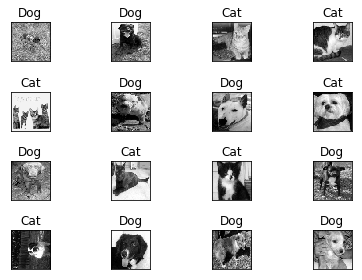

In [0]:
fig = plt.figure()
for num,data in enumerate(test_data[:16]):
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(4, 4, num+1)
    orig = img_data
    data = img_data.reshape(img_size, img_size, 1)
    model_out = model.predict([data])[0]
    print(model_out)
    if np.argmax(model_out) == 1: 
        label = 'Dog'
    else: 
        label = 'Cat'
    
    y.imshow(orig, cmap='gray')
    plt.title(label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()